<a href="https://colab.research.google.com/github/SauravBhowmick/DehradunIndiaChapter_ForestFirePredictionandEarlyWarningSystem/blob/main/Data_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading data

In [ ]:
from googleapiclient.discovery import build
from google.oauth2 import service_account

# Path to your service account key file
SERVICE_ACCOUNT_FILE = "/content/data-analysis-uttarakhand-3264e7bf4eae.json"

# Define the scope for accessing Google Drive
SCOPES = ['https://www.googleapis.com/auth/drive']

# Authenticate with the service account
credentials = service_account.Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# Build the Google Drive service
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (Extracted from the provided URL)
FOLDER_ID = '1innGjFN0XVLvg9o4-cNhCVjJRA8BEwIc'

# List files in the folder
def list_files_in_folder(folder_id):
    query = f"'{folder_id}' in parents"
    results = drive_service.files().list(q=query, fields="files(id, name)").execute()
    files = results.get('files', [])
    if not files:
        print('No files found.')
    else:
        print('Files:')
        for file in files:
            print(f"{file['name']} (ID: {file['id']})")

# Run the function
list_files_in_folder(FOLDER_ID)


Files:
uttarakhand_districts.shp (ID: 1rns1Pfj3jBVjz2ln4wc4zDyexkI1acwS)
uttarakhand_districts.prj (ID: 16bpf39kcMYrT2fXF3BagMb2OCvqHQEtS)
uttarakhand_districts.shx (ID: 1t2tY6E6R8T5f0VsHPj2YVCiVKc-UhX0u)
uttarakhand_districts.dbf (ID: 1lBPKuZRZO_yqcyGAjE_fI2js0SwkLMd2)
uttarakhand_districts.cpg (ID: 1xdv-ggDSxXhgsRLodtHPqyqzqo4yvkOP)


In [ ]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2 import service_account
import io

# Path to your service account key file
SERVICE_ACCOUNT_FILE = '/content/data-analysis-uttarakhand-3264e7bf4eae.json'

# Define the scope for Google Drive
SCOPES = ['https://www.googleapis.com/auth/drive']

# Authenticate and build the Drive API service
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=credentials)

# List of file IDs and names
files = [
    {"id": "1rns1Pfj3jBVjz2ln4wc4zDyexkI1acwS", "name": "uttarakhand_districts.shp"},
    {"id": "16bpf39kcMYrT2fXF3BagMb2OCvqHQEtS", "name": "uttarakhand_districts.prj"},
    {"id": "1xdv-ggDSxXhgsRLodtHPqyqzqo4yvkOP", "name": "uttarakhand_districts.cpg"},
    {"id": "1lBPKuZRZO_yqcyGAjE_fI2js0SwkLMd2", "name": "uttarakhand_districts.dbf"},
    {"id": "1t2tY6E6R8T5f0VsHPj2YVCiVKc-UhX0u", "name": "uttarakhand_districts.shx"},
]

# Function to download files
def download_file(file_id, file_name):
    request = drive_service.files().get_media(fileId=file_id)
    file_path = f'/content/Uttrakhand_Districts/{file_name}'
    with io.FileIO(file_path, 'wb') as file:
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
            print(f"Downloading {file_name}: {int(status.progress() * 100)}%")
    print(f"Downloaded {file_name} to {file_path}")

# Download all files
for file in files:
    download_file(file["id"], file["name"])

Downloaded uttarakhand_districts.shp to /content/Uttrakhand_Districts/uttarakhand_districts.shp
Downloaded uttarakhand_districts.prj to /content/Uttrakhand_Districts/uttarakhand_districts.prj
Downloaded uttarakhand_districts.cpg to /content/Uttrakhand_Districts/uttarakhand_districts.cpg
Downloaded uttarakhand_districts.dbf to /content/Uttrakhand_Districts/uttarakhand_districts.dbf
Downloaded uttarakhand_districts.shx to /content/Uttrakhand_Districts/uttarakhand_districts.shx


In [ ]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2 import service_account
import io

# Path to your service account key file
SERVICE_ACCOUNT_FILE = '/content/data-analysis-uttarakhand-3264e7bf4eae.json'

# Define the scope for Google Drive
SCOPES = ['https://www.googleapis.com/auth/drive']

# Authenticate and build the Drive API service
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=credentials)

# List of file IDs and names
files = [
    {"id": "1bkXjQcCy7kWByqWo97FBJ8PXjkUHedhk", "name": "uttarakhand_WGS1984.shp"},
    {"id": "1WGJ5ku5iBlcVApS7ywLH634f5jawnqQ6", "name": "uttarakhand_WGS1984.prj"},
    {"id": "1hpYKU3-tzTRm9nVCHPubtoyHfBdJ7yAJ", "name": "uttarakhand_WGS1984.cpg"},
    {"id": "1T2CBmY8-MLo27PpcznhzZltVhTXv2PU9", "name": "uttarakhand_WGS1984.dbf"},
    {"id": "1VqUkoDYyJcZnwA7GVmYG-hqPuoAhGVNF", "name": "uttarakhand_WGS1984.qmd"},
    {"id": "1Zm95tWMv3nyD44yuH62pa4W8QJZRs6Yn", "name": "uttarakhand_WGS1984.shx"},
]

# Function to download files
def download_file(file_id, file_name):
    request = drive_service.files().get_media(fileId=file_id)
    file_path = f'/content/{file_name}'
    with io.FileIO(file_path, 'wb') as file:
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
            print(f"Downloading {file_name}: {int(status.progress() * 100)}%")
    print(f"Downloaded {file_name} to {file_path}")

# Download all files
for file in files:
    download_file(file["id"], file["name"])

Downloaded uttarakhand_WGS1984.shp to /content/uttarakhand_WGS1984.shp
Downloaded uttarakhand_WGS1984.prj to /content/uttarakhand_WGS1984.prj
Downloaded uttarakhand_WGS1984.cpg to /content/uttarakhand_WGS1984.cpg
Downloaded uttarakhand_WGS1984.dbf to /content/uttarakhand_WGS1984.dbf
Downloaded uttarakhand_WGS1984.qmd to /content/uttarakhand_WGS1984.qmd
Downloaded uttarakhand_WGS1984.shx to /content/uttarakhand_WGS1984.shx


In [ ]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2 import service_account
import io

# Path to your service account key file
SERVICE_ACCOUNT_FILE = '/content/data-analysis-uttarakhand-3264e7bf4eae.json'

# Define the scope for Google Drive
SCOPES = ['https://www.googleapis.com/auth/drive']

# Authenticate and build the Drive API service
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=credentials)

# List of file IDs and names
files = [
    {"id": "1kHY9971ospxLARr1H85-ZMCmOu6zO_0D", "name": "BurnedArea_Uttarakhand.dbf"},
    {"id": "1SvALl-QY8TQ3Fmd5hv00Df7O4ye-HUmB", "name": "BurnedArea_Uttarakhand.cpg"},
    {"id": "18A67U8gw7KDo86GoDb05fbVlrp6gMB6e", "name": "BurnedArea_Uttarakhand.fix"},
    {"id": "1Aj13nZEbhkg3KyFhQENGk-3RrKPSjFWJ", "name": "BurnedArea_Uttarakhand.shx"},
    {"id": "1KlNE3IXgxjeD3hkamvFQpe7Dis0hZMLC", "name": "BurnedArea_Uttarakhand.prj"},
    {"id": "1Vc5qSQSrNoqQ1P_lljMEDBf8IR54ZyO-", "name": "BurnedArea_Uttarakhand.shp"},
]

# Function to download files
def download_file(file_id, file_name):
    request = drive_service.files().get_media(fileId=file_id)
    file_path = f'/content/Burned_Area/{file_name}'
    with io.FileIO(file_path, 'wb') as file:
        downloader = MediaIoBaseDownload(file, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
            print(f"Downloading {file_name}: {int(status.progress() * 100)}%")
    print(f"Downloaded {file_name} to {file_path}")

# Download all files
for file in files:
    download_file(file["id"], file["name"])

Downloaded BurnedArea_Uttarakhand.dbf to /content/Burned_Area/BurnedArea_Uttarakhand.dbf
Downloaded BurnedArea_Uttarakhand.cpg to /content/Burned_Area/BurnedArea_Uttarakhand.cpg
Downloaded BurnedArea_Uttarakhand.fix to /content/Burned_Area/BurnedArea_Uttarakhand.fix
Downloaded BurnedArea_Uttarakhand.shx to /content/Burned_Area/BurnedArea_Uttarakhand.shx
Downloaded BurnedArea_Uttarakhand.prj to /content/Burned_Area/BurnedArea_Uttarakhand.prj
Downloaded BurnedArea_Uttarakhand.shp to /content/Burned_Area/BurnedArea_Uttarakhand.shp


# Analysis

In [ ]:
import geopandas as gpd

shapefile_path = "/content/Uttrakhand_Districts/uttarakhand_districts.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.head())


    District        STATE REMARKS  State_LGD DISTRICT_L     Shape_Leng  \
0     ALMORA  UTTARAKHAND    None          5         45  394957.247649   
1  BAGESHWAR  UTTARAKHAND    None          5         46  315673.159842   
2  CHAMPAWAT  UTTARAKHAND    None          5         48  271591.235892   
3   DEHRADUN  UTTARAKHAND    None          5         49  503253.164310   
4   HARIDWAR  UTTARAKHAND    None          5         50  287340.472634   

     Shape_Area                                           geometry  
0  3.054452e+09  POLYGON ((79.47164 29.97947, 79.47276 29.97971...  
1  2.173076e+09  POLYGON ((79.89399 29.71221, 79.89046 29.71247...  
2  1.715187e+09  POLYGON ((80.24243 29.44379, 80.24233 29.44341...  
3  3.019033e+09  POLYGON ((77.82982 31.02876, 77.83141 31.02872...  
4  2.225505e+09  POLYGON ((78.20209 29.9661, 78.20211 29.9661, ...  


In [ ]:
gdf

District        STATE REMARKS  State_LGD DISTRICT_L  \
0              ALMORA  UTTARAKHAND    None          5         45   
1           BAGESHWAR  UTTARAKHAND    None          5         46   
2           CHAMPAWAT  UTTARAKHAND    None          5         48   
3            DEHRADUN  UTTARAKHAND    None          5         49   
4            HARIDWAR  UTTARAKHAND    None          5         50   
5            NAINITAL  UTTARAKHAND    None          5         51   
6       PAURI GARHWAL  UTTARAKHAND    None          5         52   
7         RUDRAPRAYAG  UTTARAKHAND    None          5         54   
8       TEHRI GARHWAL  UTTARAKHAND    None          5         55   
9   UDHAM SINGH NAGAR  UTTARAKHAND    None          5         56   
10            CHAMOLI  UTTARAKHAND    None          5         47   
11        PITHORAGARH  UTTARAKHAND    None          5         53   
12         UTTARKASHI  UTTARAKHAND    None          5         57   

       Shape_Leng    Shape_Area  \
0   394957.247649  3.054452e+09   
1   315673.159842  2.173076e+09   
2   271591.235892  1.715187e+09   
3   503253.164310  3.019033e+09   
4   287340.472634  2.225505e+09   
5   434894.751473  3.869770e+09   
6   414490.254454  5.131341e+09   
7   249893.932643  1.936521e+09   
8   546162.691053  3.806994e+09   
9   568974.772093  2.587998e+09   
10  522183.067166  7.618645e+09   
11  596635.247595  7.034591e+09   
12  669211.278143  7.791380e+09   

                                             geometry  
0   POLYGON ((79.47164 29.97947, 79.47276 29.97971...  
1   POLYGON ((79.89399 29.71221, 79.89046 29.71247...  
2   POLYGON ((80.24243 29.44379, 80.24233 29.44341...  
3   POLYGON ((77.82982 31.02876, 77.83141 31.02872...  
4   POLYGON ((78.20209 29.9661, 78.20211 29.9661, ...  
5   POLYGON ((79.8486 29.43207, 79.84967 29.4325, ...  
6   POLYGON ((78.8996 30.24484, 78.89925 30.24466,...  
7   POLYGON ((79.27473 30.72425, 79.27625 30.72385...  
8   POLYGON ((79.0352 30.80583, 79.0352 30.80583, ...  
9   POLYGON ((78.85598 29.34972, 78.85625 29.34992...  
10  POLYGON ((80.10011 30.78738, 80.09999 30.78733...  
11  POLYGON ((80.24243 29.44379, 80.23982 29.44484...  
12  POLYGON ((79.41053 31.0754, 79.41043 31.07532,...

<Axes: >

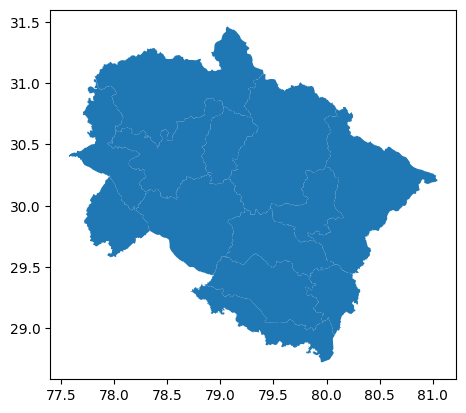

In [ ]:
gdf.plot()

In [ ]:
import geopandas as gpd

shapefile_path = "/content/Burned_Area/BurnedArea_Uttarakhand.shp"
gdf2 = gpd.read_file(shapefile_path)
print(gdf2.head())


   count  burned                                           geometry
0      1      25  POLYGON ((79.01635 29.35071, 79.01984 29.35521...
1      1      17  POLYGON ((79.03198 29.3642, 79.03547 29.3687, ...
2      1      25  POLYGON ((79.02849 29.3597, 79.03198 29.3642, ...
3      1      18  POLYGON ((79.03714 29.3642, 79.04063 29.3687, ...
4      1      25  POLYGON ((79.03881 29.3597, 79.0423 29.3642, 7...


<Axes: >

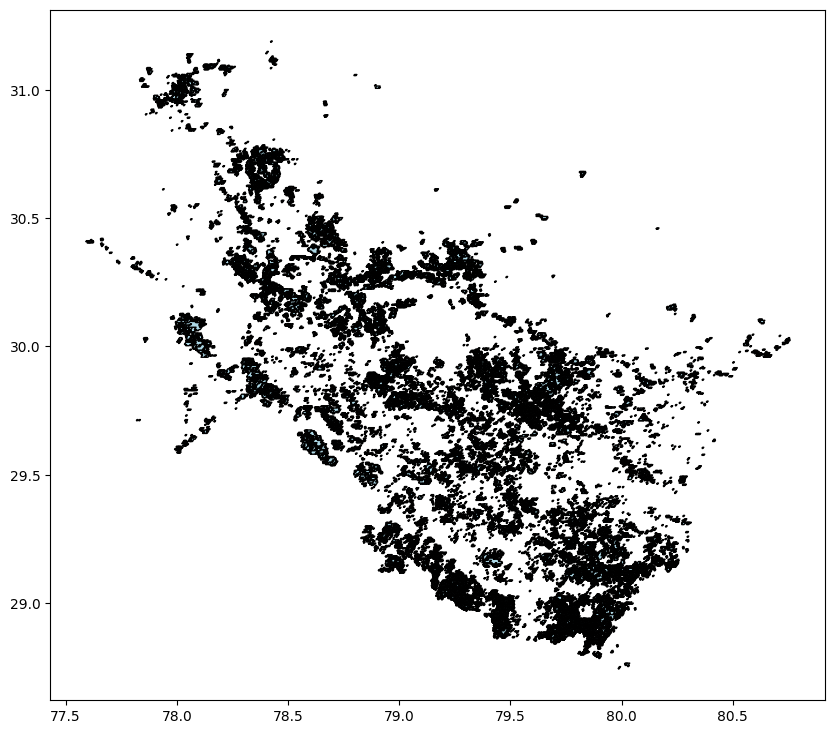

In [ ]:
gdf2.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='ee-bhowmicksaurav')


*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [ ]:
# Import Earth Engine
import ee

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the shapefile from Earth Engine Assets
uttarakhand = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/Uttarakhand-boundary")

# Print details about the shapefile (optional)
print(uttarakhand.getInfo())


{'type': 'FeatureCollection', 'columns': {'STATE': 'String', 'Shape_Area': 'Float', 'Shape_Leng': 'Float', 'State_LGD': 'Long', 'system:index': 'String'}, 'version': 1733132314983515, 'id': 'projects/ee-bhowmicksaurav/assets/Uttarakhand-boundary', 'properties': {'system:asset_size': 152477}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[77.57231450945571, 30.41044935748887], [77.57233680954047, 30.409031342861944], [77.57236356963637, 30.40792548257725], [77.57236356963637, 30.407907658948393], [77.57262216278623, 30.40651200036795], [77.57325539431214, 30.404496502491888], [77.57391975452882, 30.402538901745867], [77.57456635858219, 30.400576957985976], [77.57478034750606, 30.400055178703944], [77.57479818718556, 30.400015101102994], [77.57479818718556, 30.400006188694793], [77.574802647105, 30.400006184934863], [77.57482048678101, 30.399957108370405], [77.57486508595869, 30.399841209322894], [77.57511484102889, 30.399212454292798], [77.57580594961

In [ ]:
#Downloading landcover data
modis = ee.ImageCollection("MODIS/006/MCD12Q1")


In [ ]:
modis_clipped = modis.map(lambda img: img.clip(uttarakhand))


In [ ]:
# Resample the MODIS data to 500m resolution
modis_resampled = modis_clipped.map(
    lambda img: img.resample('bilinear').reproject(crs='EPSG:4326', scale=500)
)


In [ ]:
import geemap
Map = geemap.Map()
Map.centerObject(uttarakhand, 8)
Map

Map(center=[30.155046043180448, 79.210196652578], controls=(WidgetControl(options=['position', 'transparent_bg…

In [ ]:
# Load MODIS land cover dataset
modis_dataset = ee.ImageCollection("MODIS/006/MCD12Q1").filterDate('2012-01-01', '2012-12-31')


# Select the first image and clip it to the Uttarakhand boundary
modis_image = modis_dataset.select('LC_Type1').first()
modis_clipped = modis_image.clip(uttarakhand)


In [ ]:
modis_dataset = ee.ImageCollection("MODIS/006/MCD12Q1")#.filterDate('2012-01-01', '2012-12-31')
print("Number of images:", modis_dataset.size().getInfo())


Number of images: 20


In [ ]:
import folium

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 17,
    'palette': [
        '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
        'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
        '69fff8', 'f9ffa4'
    ]
}

# Generate a map ID
map_id_dict = modis_clipped.getMapId(vis_params)

# Create a folium map centered around Uttarakhand
map_center = [30.0668, 79.0193]  # Approximate center of Uttarakhand
mymap = folium.Map(location=map_center, zoom_start=8)

# Add MODIS land cover layer to the map
folium.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='MODIS Land Cover (Uttarakhand)'
).add_to(mymap)

mymap.add_child(folium.LayerControl())
mymap


# EDA on Burned Area

In [ ]:
# Import Earth Engine
import ee

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the shapefile from Earth Engine Assets
BurnedArea_Uttarakhand = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/BurnedArea_Uttarakhand")

# Example: Define a region of interest (bounding box or geometry)
roi = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/Nainital_dist_boundary")

# Filter the FeatureCollection to include only features within the region
BurnedArea_Nainital = BurnedArea_Uttarakhand.filterBounds(roi)

# Print details of the filtered FeatureCollection
print(BurnedArea_Nainital.getInfo())


{'type': 'FeatureCollection', 'columns': {'burned': 'Integer', 'count': 'Integer', 'system:index': 'String'}, 'version': 1733133114843866, 'id': 'projects/ee-bhowmicksaurav/assets/BurnedArea_Uttarakhand', 'properties': {'system:asset_size': 6017543}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[79.11573866594229, 29.319231498601074], [79.12089337501335, 29.319231541310486], [79.1243804056503, 29.32373073277981], [79.11922571317396, 29.323730780489417], [79.11573866594229, 29.319231498601074]]]}, 'id': '00000000000000001198', 'properties': {'burned': 1, 'count': 1}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[79.4374449454193, 29.53956467310543], [79.4339134060882, 29.5350698258515], [79.43908144554905, 29.535069822094133], [79.4426130441768, 29.539564668575444], [79.4374449454193, 29.53956467310543]]]}, 'id': '00000000000000006f71', 'properties': {'burned': 1, 'count': 1}}, {'type': 'Feature', 'geometry': {'type': 'Polygo

In [ ]:
# Import Earth Engine
import ee
import geemap

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the shapefile from Earth Engine Assets
BurnedArea_Uttarakhand = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/BurnedArea_Uttarakhand")

# Define a region of interest (bounding box or geometry)
roi = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/Nainital_dist_boundary")

# Filter the FeatureCollection to include only features within the region
BurnedArea_Nainital = BurnedArea_Uttarakhand.filterBounds(roi)

# Print the size of the filtered FeatureCollection
print("Number of burned area features in Nainital:", BurnedArea_Nainital.size().getInfo())

# Visualize Data on Map
Map = geemap.Map()
Map.centerObject(roi, 10)  # Center map on ROI
Map.addLayer(BurnedArea_Uttarakhand, {}, "Burned Area Uttarakhand")
Map.addLayer(BurnedArea_Nainital, {"color": "red"}, "Burned Area Nainital")
Map.addLayer(roi, {"color": "blue"}, "Nainital Boundary")
Map


Number of burned area features in Nainital: 4464


Map(center=[29.31735283562217, 79.4635915662772], controls=(WidgetControl(options=['position', 'transparent_bg…

In [ ]:
# Load MODIS land cover dataset
modis_dataset = ee.ImageCollection("MODIS/006/MCD12Q1").filterDate('2012-01-01', '2012-12-31')


# Select the first image and clip it to the Uttarakhand boundary
modis_image1 = modis_dataset.select('LC_Type1').first()
modis_clipped_Nainital = modis_image1.clip(BurnedArea_Nainital)


In [ ]:
import folium

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 17,
    'palette': [
        '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
        'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
        '69fff8', 'f9ffa4'
    ]
}

# Generate a map ID
map_id_dict = modis_clipped_Nainital.getMapId(vis_params)

# Create a folium map centered around Uttarakhand
map_center = [30.0668, 79.0193]  # Approximate center of Uttarakhand
mymap = folium.Map(location=map_center, zoom_start=8)

# Add MODIS land cover layer to the map
folium.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='MODIS Land Cover (Uttarakhand)'
).add_to(mymap)

mymap.add_child(folium.LayerControl())
mymap


In [ ]:
# Import libraries
import ee
import folium

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load MODIS land cover dataset
modis_dataset = ee.ImageCollection("MODIS/006/MCD12Q1").filterDate('2012-01-01', '2012-12-31')

# Select the first image and clip it to the Nainital boundary
modis_image1 = modis_dataset.select('LC_Type1').first()
modis_clipped_Nainital = modis_image1.clip(BurnedArea_Nainital)

# Define visualization parameters for MODIS land cover
vis_params = {
    'min': 0,
    'max': 17,
    'palette': [
        '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
        'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
        '69fff8', 'f9ffa4'
    ]
}

# Generate a map ID for MODIS land cover
map_id_dict = modis_clipped_Nainital.getMapId(vis_params)

# Create a folium map centered around Nainital
map_center = [29.3803, 79.4636]  # Approximate center of Nainital
mymap = folium.Map(location=map_center, zoom_start=10)

# Add MODIS land cover layer to the map
folium.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='MODIS Land Cover (Nainital)'
).add_to(mymap)

# Highlight the Nainital boundary on the map
# Define a style function for the boundary
def style_function(feature):
    return {
        'fillOpacity': 0,       # Make interior transparent
        'weight': 2,            # Boundary line width
        'color': 'blue'         # Boundary line color
    }

# Convert the Nainital boundary to GeoJSON for folium
nainital_boundary_geojson = BurnedArea_Nainital.getInfo()['features']

# Filter out features with invalid or missing geometries
valid_features = [feature for feature in nainital_boundary_geojson if feature['geometry']]

# Construct a valid GeoJSON structure
valid_geojson = {
    "type": "FeatureCollection",
    "features": valid_features
}

# Add the Nainital boundary layer
folium.GeoJson(
    data=valid_geojson,
    style_function=style_function,
    name='Nainital Boundary'
).add_to(mymap)

# Add layer control to the map
mymap.add_child(folium.LayerControl())

# Display the map
mymap


In [ ]:
# Import Earth Engine
import ee

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the shapefile from Earth Engine Assets
Uttarakhand_Dist = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/uttarakhand_districts")

# Example: Define a region of interest (bounding box or geometry)
#roi = ee.FeatureCollection("projects/ee-bhowmicksaurav/assets/Nainital_dist_boundary")

# Filter the FeatureCollection to include only features within the region
#BurnedArea_Nainital = BurnedArea_Uttarakhand.filterBounds(roi)

# Print details of the filtered FeatureCollection
print(Uttarakhand_Dist.getInfo())

{'type': 'FeatureCollection', 'columns': {'DISTRICT_L': 'String', 'District': 'String', 'REMARKS': 'String', 'STATE': 'String', 'Shape_Area': 'Float', 'Shape_Leng': 'Float', 'State_LGD': 'Long', 'system:index': 'String'}, 'version': 1733151063184696, 'id': 'projects/ee-bhowmicksaurav/assets/uttarakhand_districts', 'properties': {'system:asset_size': 457340}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[79.03709800718796, 29.584543556730516], [79.03788724631654, 29.58444994208636], [79.03890834121694, 29.584530223295335], [79.0401837029786, 29.584833431810555], [79.04123158911678, 29.584913738839294], [79.04179782053205, 29.584721977134667], [79.04308211101392, 29.584258202553354], [79.04384905574082, 29.583839033605035], [79.04441984142831, 29.583544726355395], [79.0451020207128, 29.58310329997639], [79.04533395366663, 29.582831319036913], [79.0459849149088, 29.582586032127132], [79.04686340381049, 29.582568172992982], [79.04759022680145, 29.582528